### Import libraries 

In [148]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt 
import re 

import scipy.stats as stats  

%matplotlib inline 

sns.set(style = "ticks")

from dateutil.relativedelta import relativedelta

In [149]:
df = pd.read_csv('bankloans data.csv')

In [150]:
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [151]:
df.tail()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
845,34,1,12,15,32,2.7,0.239328,0.624672,NaN
846,32,2,12,11,116,5.7,4.026708,2.585292,NaN
847,48,1,13,11,38,10.8,0.722304,3.381696,NaN
848,35,2,1,11,24,7.8,0.417456,1.454544,NaN
849,37,1,20,13,41,12.9,0.899130,4.389870,NaN


In [152]:
present_data = df[df['default'].isnull() == False]

In [153]:
df.shape

(850, 9)

In [154]:
present_data.shape

(700, 9)

In [155]:
test_data = df[df['default'].isnull() == True]

In [156]:
test_data.shape

(150, 9)

In [157]:
present_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       700 non-null    int64  
 1   ed        700 non-null    int64  
 2   employ    700 non-null    int64  
 3   address   700 non-null    int64  
 4   income    700 non-null    int64  
 5   debtinc   700 non-null    float64
 6   creddebt  700 non-null    float64
 7   othdebt   700 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 54.7 KB


In [158]:
present_data.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

In [159]:
present_data.duplicated().sum()

0

### Outlier Detection and Treatment Process

In [161]:
present_data.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

<Axes: >

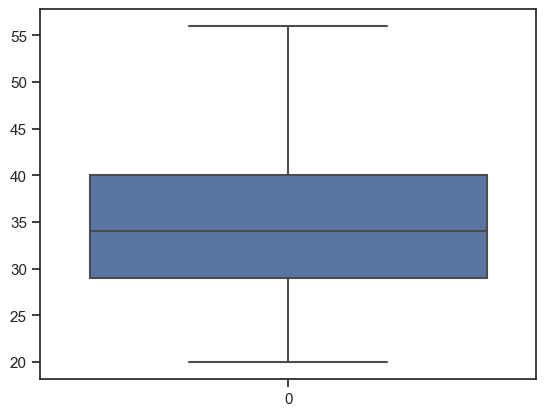

In [162]:
sns.boxplot(present_data.age)

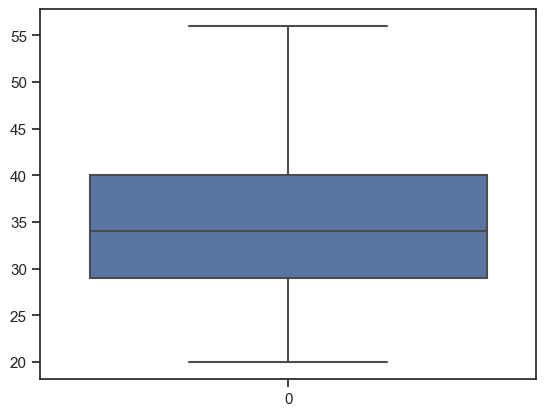

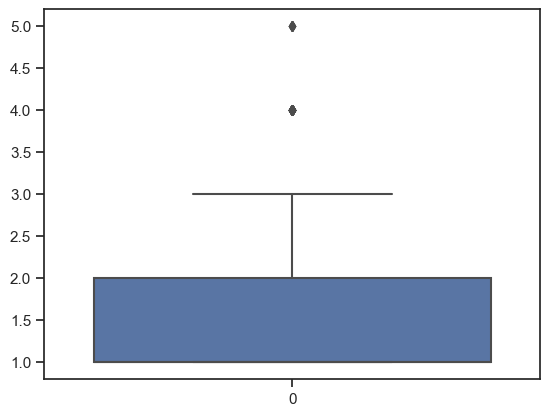

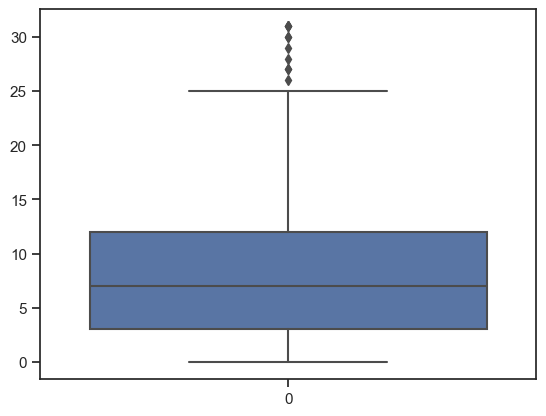

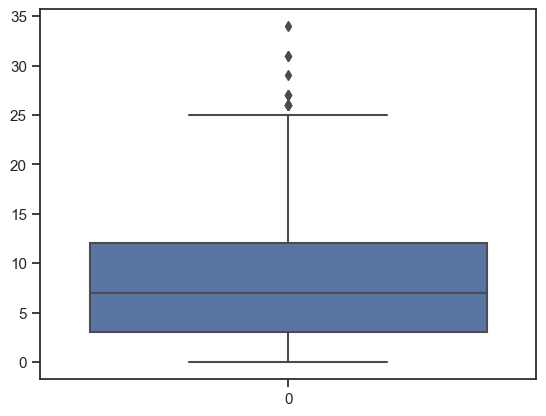

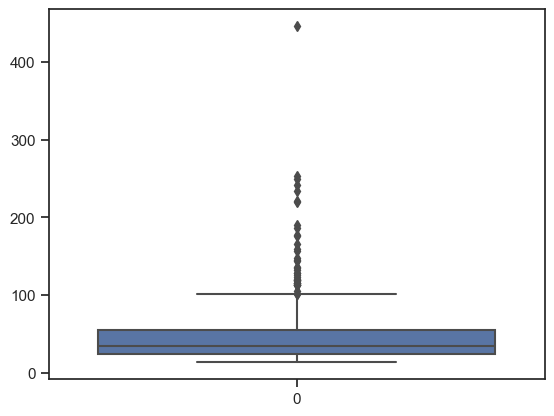

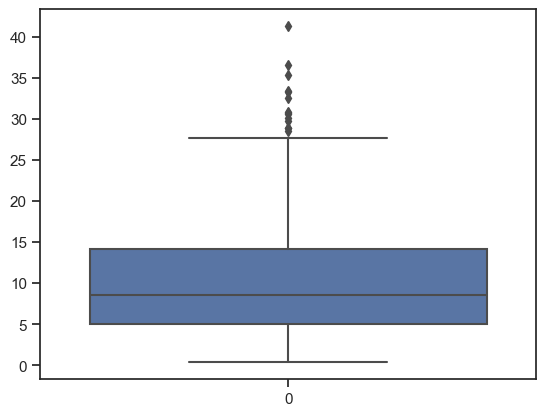

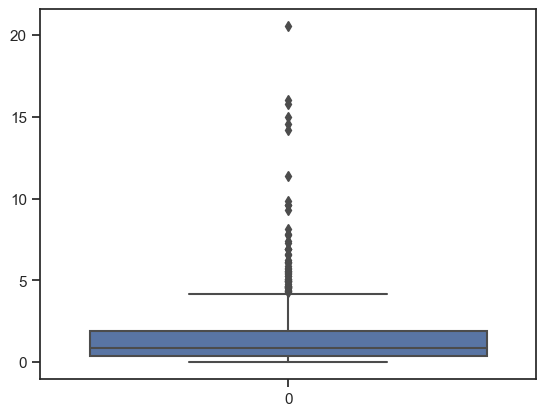

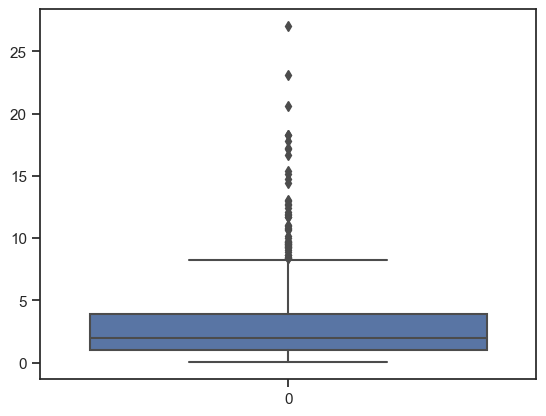

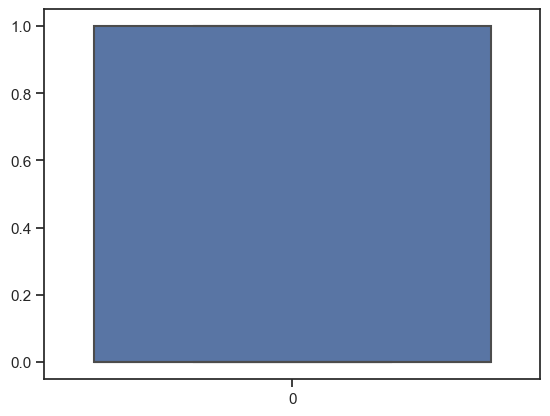

In [163]:
for i in present_data.columns:
    sns.boxplot(present_data[i])
    plt.show()

In [164]:
present_data.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

In [165]:
def outliertreat_IQR(d):
    m = d.quantile(0.5)
    q1 = d.quantile(0.25)
    q3 = d.quantile(0.75)
    q_1p = d.quantile(0.01)
    q_99p = d.quantile(0.99)
    iqr = q3 - q1
    lc = q1 - 1.5*iqr
    uc = q3 + 1.5*iqr
    return lc,uc

In [166]:
present_data.apply(outliertreat_IQR)

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,12.5,-0.5,-10.5,-10.5,-22.5,-8.6875,-1.930284,-3.274152,-1.5
1,56.5,3.5,25.5,25.5,101.5,27.8125,4.201299,8.241395,2.5


### Checking the Probability Distribution of the Variables

In [168]:
present_data.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


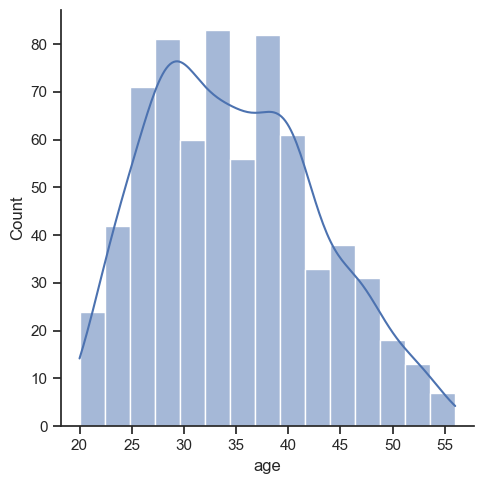

In [169]:
sns.displot(present_data.age, kde = True)

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

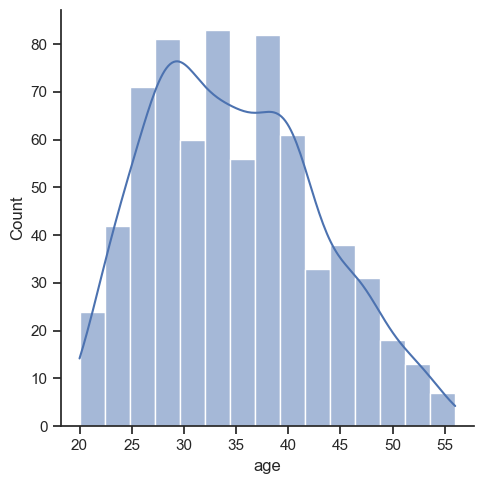

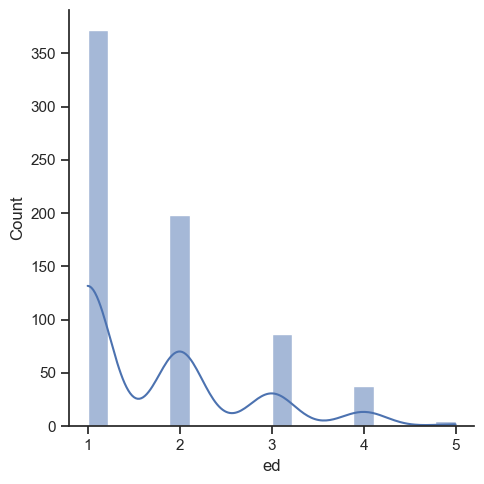

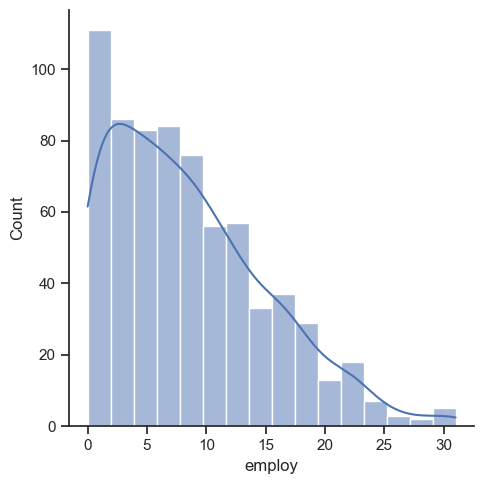

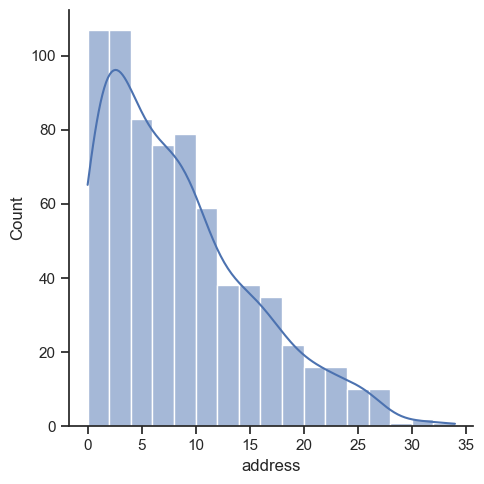

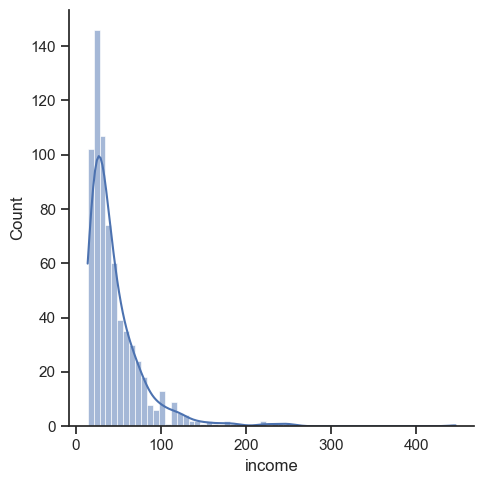

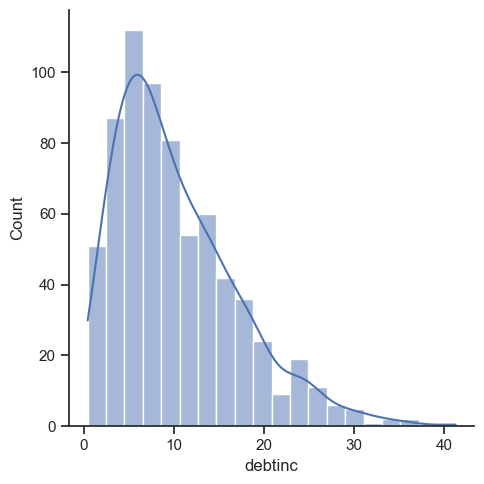

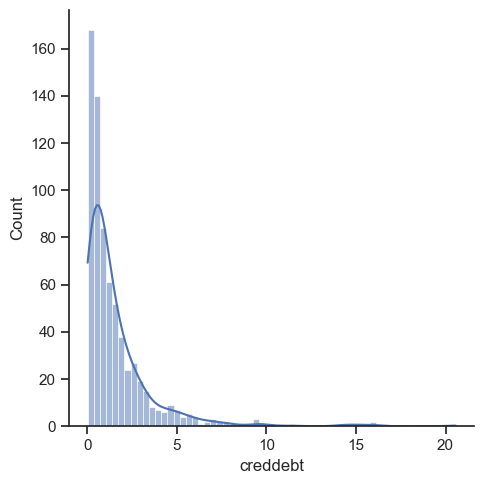

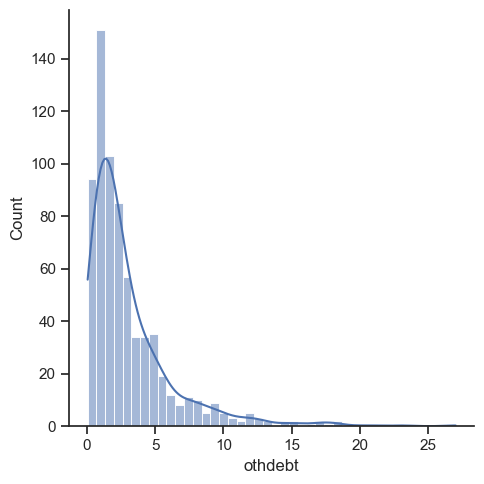

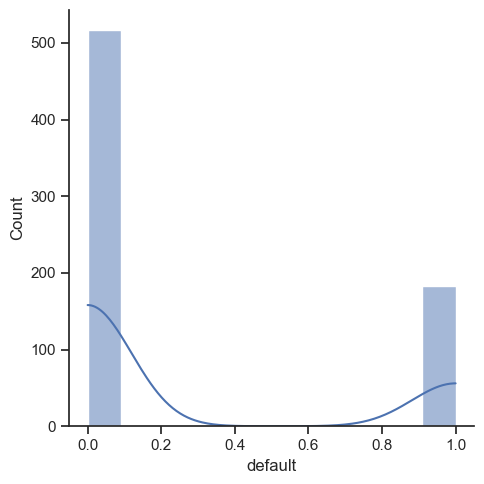

In [170]:
for i in present_data.columns:
    sns.displot(present_data[i], kde = True)

In [171]:
## lets do log transformations on all the variables

In [172]:
p_copy = present_data.copy()

In [173]:
p_copy.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [174]:
p_copy['log_age'] = np.log(p_copy['age'])

In [175]:
p_copy.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default,log_age
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0,3.713572
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0,3.295837
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0,3.688879
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0,3.713572
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0,3.178054


In [176]:
p_copy['log_ed'] = np.log(p_copy['ed'])

In [177]:
p_copy['log_income'] = np.log(p_copy['income'])

In [178]:
p_copy['log_debtinc'] = np.log(p_copy['debtinc'])

In [179]:
p_copy['log_creddebt'] = np.log(p_copy['creddebt'])

In [180]:
p_copy['log_othdebt'] = np.log(p_copy['othdebt'])

In [181]:
p_copy.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default,log_age,log_ed,log_income,log_debtinc,log_creddebt,log_othdebt
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0,3.713572,1.098612,5.170484,2.230014,2.430045,1.611158
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0,3.295837,0.000000,3.433987,2.850707,0.309103,1.386494
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0,3.688879,0.000000,4.007333,1.704748,-0.155397,0.774232
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0,3.713572,0.000000,4.787492,1.064711,0.977845,-0.196891
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0,3.178054,0.693147,3.332205,2.850707,0.580782,1.117291


In [182]:
p_copy = p_copy.drop(columns = ['age', 'ed', 'debtinc', 'creddebt', 'othdebt','income'])

In [183]:
p_copy.head()

,employ,address,default,log_age,log_ed,log_income,log_debtinc,log_creddebt,log_othdebt
0,17,12,1.0,3.713572,1.098612,5.170484,2.230014,2.430045,1.611158
1,10,6,0.0,3.295837,0.000000,3.433987,2.850707,0.309103,1.386494
2,15,14,0.0,3.688879,0.000000,4.007333,1.704748,-0.155397,0.774232
3,15,14,0.0,3.713572,0.000000,4.787492,1.064711,0.977845,-0.196891
4,2,0,1.0,3.178054,0.693147,3.332205,2.850707,0.580782,1.117291


### Splitting the Data into Training and Testing Datasets using SKLearn method

In [185]:
p_copy.head()

,employ,address,default,log_age,log_ed,log_income,log_debtinc,log_creddebt,log_othdebt
0,17,12,1.0,3.713572,1.098612,5.170484,2.230014,2.430045,1.611158
1,10,6,0.0,3.295837,0.000000,3.433987,2.850707,0.309103,1.386494
2,15,14,0.0,3.688879,0.000000,4.007333,1.704748,-0.155397,0.774232
3,15,14,0.0,3.713572,0.000000,4.787492,1.064711,0.977845,-0.196891
4,2,0,1.0,3.178054,0.693147,3.332205,2.850707,0.580782,1.117291


In [186]:
p_copy.shape

(700, 9)

In [187]:
y = p_copy.default

In [188]:
y

0      1.0
1      0.0
2      0.0
3      0.0
4      1.0
      ... 
695    1.0
696    0.0
697    0.0
698    0.0
699    0.0
Name: default, Length: 700, dtype: float64

In [189]:
x = p_copy.columns.difference(['default'])

In [190]:
x

Index(['address', 'employ', 'log_age', 'log_creddebt', 'log_debtinc', 'log_ed',
       'log_income', 'log_othdebt'],
      dtype='object')

In [191]:
X = p_copy[x]

In [192]:
X

,address,employ,log_age,log_creddebt,log_debtinc,log_ed,log_income,log_othdebt
0,12,17,3.713572,2.430045,2.230014,1.098612,5.170484,1.611158
1,6,10,3.295837,0.309103,2.850707,0.000000,3.433987,1.386494
2,14,15,3.688879,-0.155397,1.704748,0.000000,4.007333,0.774232
3,14,15,3.713572,0.977845,1.064711,0.000000,4.787492,-0.196891
4,0,2,3.178054,0.580782,2.850707,0.693147,3.332205,1.117291
...,...,...,...,...,...,...,...,...
695,15,6,3.583519,-1.339174,1.526056,0.693147,3.295837,-0.020266
696,4,6,3.367296,-0.995618,2.442347,0.693147,3.044522,0.715645
697,3,15,3.496508,-0.710774,2.028148,0.000000,3.465736,0.663067
698,22,19,3.806662,0.834042,2.128232,0.000000,4.343805,1.426810


### DECISION TREE ALGORITHM

In [194]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [195]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=123)

In [196]:
train_X.shape

(490, 8)

In [197]:
train_y.shape

(490,)

In [198]:
test_X.shape

(210, 8)

In [199]:
test_y.shape

(210,)

In [200]:
train_X.columns

Index(['address', 'employ', 'log_age', 'log_creddebt', 'log_debtinc', 'log_ed',
       'log_income', 'log_othdebt'],
      dtype='object')

### Building a Decision Tree Model

In [202]:
dct = DecisionTreeClassifier(max_depth= 6, max_features=9, max_leaf_nodes=20).fit(train_X, train_y)

In [203]:
train_y

404    0.0
63     0.0
34     0.0
33     0.0
583    1.0
      ... 
98     0.0
322    0.0
382    1.0
365    0.0
510    0.0
Name: default, Length: 490, dtype: float64

In [204]:
pred_class = dct.predict(train_X)

In [205]:
pred_class

array([0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 1.

In [206]:
print('train_auc:', metrics.roc_auc_score(train_y, pred_class))

train_auc: 0.8362747587607923


In [207]:
#You don't have to change the hyper-parameters manually by hit and trial method everytime, otherwise it will take a lot of time.
#To get the best hyper-parameters, we can use the Grid Search Cross validation.

In [208]:
param_grid = {'max_depth': [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20], 'max_features':[3,4,5,6,7,8,9], 'max_leaf_nodes': [6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]}

In [209]:
from sklearn.model_selection import GridSearchCV

In [210]:
dt_model = GridSearchCV(DecisionTreeClassifier(), param_grid,cv=5,scoring='roc_auc').fit(train_X, train_y)

In [281]:
dt_model.best_params_

{'max_depth': 3, 'max_features': 3, 'max_leaf_nodes': 17}

In [283]:
dt_model.best_score_

0.7763156574776293

In [285]:
dct_1 = DecisionTreeClassifier(max_depth= 6, max_features=4, max_leaf_nodes=6).fit(train_X, train_y)

In [287]:
pred_class = dct_1.predict(train_X)

In [289]:
pred_class

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [291]:
print('train_auc:', metrics.roc_auc_score(train_y, pred_class))

train_auc: 0.6479177247333672


In [293]:
pred_test_class = dct_1.predict(test_X)

In [295]:
print('train_auc:', metrics.roc_auc_score(test_y, pred_test_class))

train_auc: 0.5693673695893452
